<a href="https://colab.research.google.com/github/sigmundojr/learningML/blob/master/decisionTreeSalary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree 
### Salary and Companies
The idea here is to use a Decision Tree algorithm in order to understand when the salary for a position can goes > UsD100k/yr based on some features like: company, job title and degree.

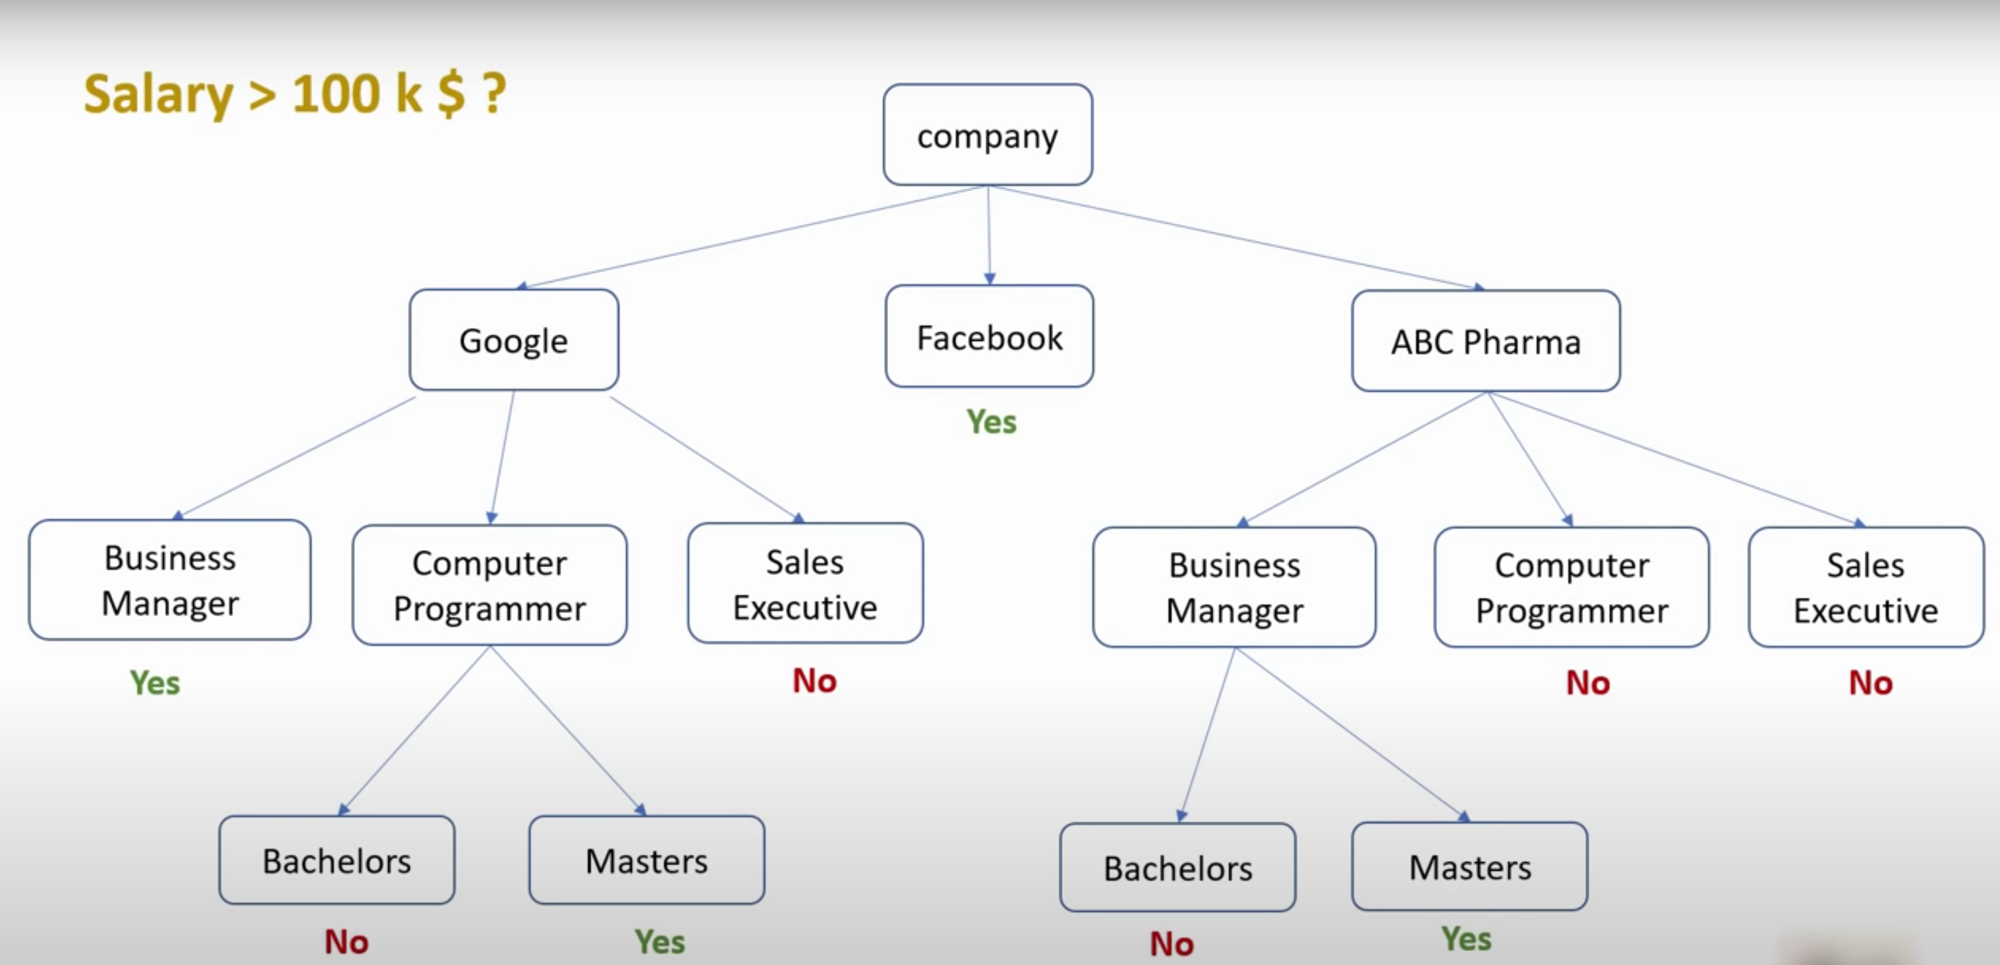

In [2]:
import pandas as pd
df = pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [5]:
# divided the dataset into dependent and independent variables
inputs = df.drop('salary_more_then_100k', axis='columns')
target = df['salary_more_then_100k']
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# Creating three columns - objects of the class
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [9]:
# Creating extra columns to transform text into numbers
# Google stands for 2, bachelors for 0, and so forth
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_company.fit_transform(inputs['job'])
inputs['degree_n'] = le_company.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [11]:
# Drop more than one column, lefting just numbers
inputs_n = inputs.drop(['company','job','degree'], axis='columns')
inputs_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [12]:
from sklearn import tree

In [13]:
model = tree.DecisionTreeClassifier()

In [14]:
# Training our model
model.fit(inputs_n,target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
# Predincting the socre
# It is 1 because I'm using my own dataset trained to predict
# normal is less than 1
model.score(inputs_n, target)

1.0

In [18]:
# Google, Sales Executive, Masters
# Array 0 means it is less than 100k/yr
model.predict([[2,2,2]])

array([0])

In [19]:
# Google, Sales Manager, Masters
# Array 1 means it is greater than 100k/yr
model.predict([[2,0,1]])

array([1])

In [ ]:
#Tks to Kaggle dataset and Mr. CodeBasics